In [1]:
!pip install wordcloud


In [24]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


# NLP libraries
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer


from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, f1_score


from wordcloud import WordCloud


nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Lenovo\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [25]:
# Load dataset 
# Load TSV file
df = pd.read_csv(r"D:\data science\Assignments\assignment pnyb\amazonreviews.tsv", sep='\t')

# Check first few rows
df.head()

,label,review
0,pos,Stuning even for the non-gamer: This sound tra...
1,pos,The best soundtrack ever to anything.: I'm rea...
2,pos,Amazing!: This soundtrack is my favorite music...
3,pos,Excellent Soundtrack: I truly like this soundt...
4,pos,"Remember, Pull Your Jaw Off The Floor After He..."


In [26]:
# Data Cleaning
 # Check for Missing Values and Duplicates

# Check missing values
df.isnull().sum()


# Remove missing reviews
df.dropna(inplace=True)


# Remove duplicate rows
df.drop_duplicates(inplace=True)


print('Dataset shape after cleaning:', df.shape)

Dataset shape after cleaning: (10000, 2)


In [28]:
# Text Preprocessing
stop_words = set(stopwords.words('english'))
stemmer = PorterStemmer()




def preprocess_text(text):
 text = text.lower()
 text = re.sub(r'[^a-zA-Z]', ' ', text)
 words = text.split()
 words = [stemmer.stem(word) for word in words if word not in stop_words]
 return ' '.join(words)


# Apply preprocessing
df['clean_review'] = df['review'].apply(preprocess_text)


df.head()

,label,review,clean_review
0,pos,Stuning even for the non-gamer: This sound tra...,stune even non gamer sound track beauti paint ...
1,pos,The best soundtrack ever to anything.: I'm rea...,best soundtrack ever anyth read lot review say...
2,pos,Amazing!: This soundtrack is my favorite music...,amaz soundtrack favorit music time hand intens...
3,pos,Excellent Soundtrack: I truly like this soundt...,excel soundtrack truli like soundtrack enjoy v...
4,pos,"Remember, Pull Your Jaw Off The Floor After He...",rememb pull jaw floor hear play game know divi...


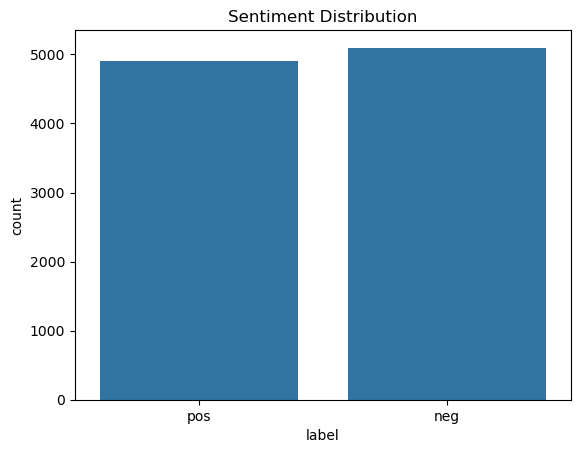

In [29]:
# Exploratory Data Analysis (EDA)
 # Sentiment Distribution

sns.countplot(x='label', data=df)
plt.title('Sentiment Distribution')
plt.show()

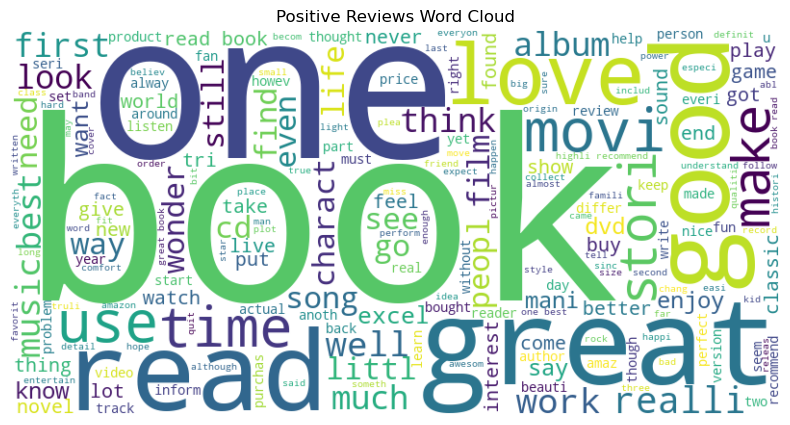

In [30]:
# Word Cloud – Positive Reviews

positive_text = ' '.join(df[df['label'] == 'pos']['clean_review'])


wordcloud_pos = WordCloud(width=800, height=400, background_color='white').generate(positive_text)


plt.figure(figsize=(10,5))
plt.imshow(wordcloud_pos, interpolation='bilinear')
plt.axis('off')
plt.title('Positive Reviews Word Cloud')
plt.show()

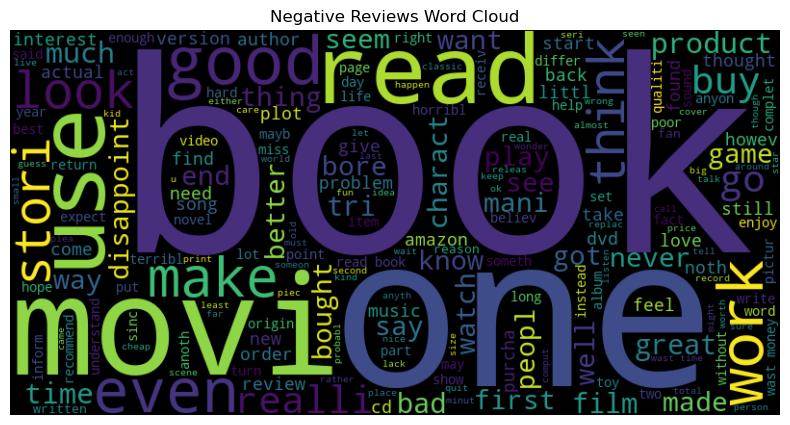

In [17]:
# Word Cloud – Negative Reviews

negative_text = ' '.join(df[df['label'] == 'neg']['clean_review'])


wordcloud_neg = WordCloud(width=800, height=400, background_color='black').generate(negative_text)


plt.figure(figsize=(10,5))
plt.imshow(wordcloud_neg, interpolation='bilinear')
plt.axis('off')
plt.title('Negative Reviews Word Cloud')
plt.show()

In [31]:
# Feature Extraction (TF-IDF)

X = df['clean_review']
y = df['label'].map({'pos': 1, 'neg': 0})


X_train, X_test, y_train, y_test = train_test_split(
X, y, test_size=0.2, random_state=42, stratify=y
)


tfidf = TfidfVectorizer(max_features=5000, ngram_range=(1,2))


X_train_tfidf = tfidf.fit_transform(X_train)
X_test_tfidf = tfidf.transform(X_test)

In [32]:
 # Model Development
 # Logistic Regression Model

lr_model = LogisticRegression(max_iter=1000)
lr_model.fit(X_train_tfidf, y_train)


y_pred_lr = lr_model.predict(X_test_tfidf)


print('Logistic Regression Accuracy:', accuracy_score(y_test, y_pred_lr))
print('F1 Score:', f1_score(y_test, y_pred_lr))
print(classification_report(y_test, y_pred_lr))

Logistic Regression Accuracy: 0.847
F1 Score: 0.844354018311292
              precision    recall  f1-score   support

           0       0.85      0.85      0.85      1019
           1       0.84      0.85      0.84       981

    accuracy                           0.85      2000
   macro avg       0.85      0.85      0.85      2000
weighted avg       0.85      0.85      0.85      2000



In [33]:
# Support Vector Machine (SVM)
svm_model = LinearSVC()
svm_model.fit(X_train_tfidf, y_train)


y_pred_svm = svm_model.predict(X_test_tfidf)


print('SVM Accuracy:', accuracy_score(y_test, y_pred_svm))
print('F1 Score:', f1_score(y_test, y_pred_svm))
print(classification_report(y_test, y_pred_svm))

SVM Accuracy: 0.8315
F1 Score: 0.8284987277353689
              precision    recall  f1-score   support

           0       0.84      0.83      0.83      1019
           1       0.83      0.83      0.83       981

    accuracy                           0.83      2000
   macro avg       0.83      0.83      0.83      2000
weighted avg       0.83      0.83      0.83      2000



In [22]:
# Model Validation – Cross Validation

cv_scores = cross_val_score(lr_model, X_train_tfidf, y_train, cv=5, scoring='f1')


print('Cross-validation F1 scores:', cv_scores)
print('Average F1 score:', cv_scores.mean())

Cross-validation F1 scores: [0.86349206 0.8504436  0.85806037 0.85641026 0.85019206]
Average F1 score: 0.8557196706732512


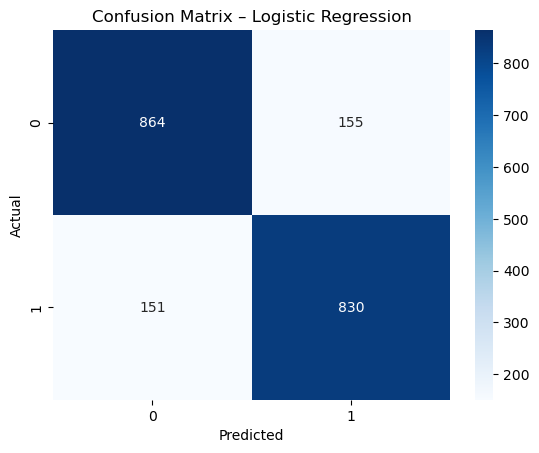

In [34]:
# Confusion Matrix (Best Model)

cm = confusion_matrix(y_test, y_pred_lr)


sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix – Logistic Regression')
plt.show()

In [ ]:
# Results 

# TF-IDF + Logistic Regression performs strongly with high accuracy and F1-score
# SVM provides comparable performance but is computationally heavier

# Word clouds reveal:

# Positive reviews: words like great, excellent, love, amazing
# Negative reviews: words like bad, poor, waste, disappointed

# Business Impact
# Enables real-time sentiment tracking
# Helps identify problematic products quickly
# Improves customer satisfaction and retention